# Classification using Basic Image Processing

We will perform the classification of Nuts and Bolts using basic image processing and an "IF"
This is to get you familiar with the Basic image processing functions using Scikit-Image
Before you work on the data / image, you may have to pre-process them to get uniformity and better performance

These are stages in this Classification process
* Pre-processing & Binarizing
* Contour Detection
* Feature extraction
* Thresholding (classifying)

### Pre-processing
Preprocessing includes Converting the colorspace to Gray and Smoothing (applying filter) the image, etc

In [1]:
# Import necessary modules
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read the image and Convert it to Grayscale
image = cv2.imread('../data/nuts_bolts_v1/bolt.jpg')
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#gray_img = cv2.GaussianBlur(gray_img, (5, 5), 0)

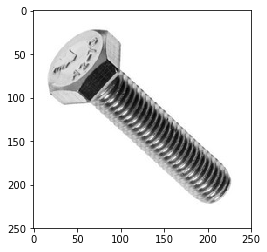

In [3]:
plt.imshow(gray_img, 'gray')
plt.show()

### Binarizing and Cleaning
When you need to work with only two levels of pixel values, you can binarize the image which gives an image with only two pixel values(0, 255)

If you have a lot of discontinuities in the image, you can smooth them out with the morphological operations like **Erosion** and **Dilation**

In [4]:
# Binarize the image using Adaptive thresholding
th, bin_img = cv2.threshold(gray_img, 250, 255, cv2.THRESH_BINARY_INV)

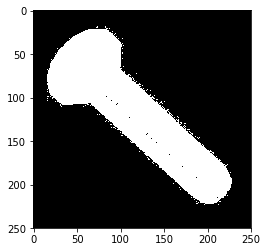

In [5]:
plt.imshow(bin_img, 'gray')
plt.show()

In [6]:
# Close the holes by Morphological operations (Erosion and Dilation)
struct_elem = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
smooth_bin_img = cv2.erode(bin_img, struct_elem, iterations=1)
smooth_bin_img = cv2.dilate(smooth_bin_img, struct_elem, iterations=2)

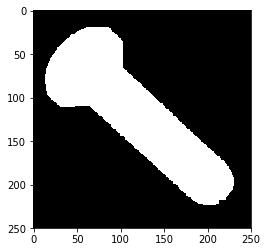

In [7]:
plt.imshow(smooth_bin_img, 'gray')
plt.show()

### Contour Detection
Contours are the closed regions in an image. Contours have many important properties which can be used in different classification problems

In [8]:
# Find all the contours from the binary image
img, contours, heirarchy = cv2.findContours(smooth_bin_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

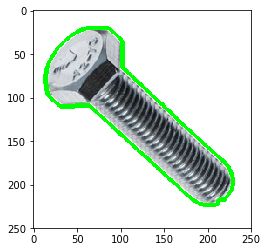

In [9]:
# Display the image and plot all contours found
cnt_img = cv2.drawContours(image, contours, -1, (0, 255, 0), 3)
plt.imshow(cnt_img)
plt.show()

### Feature extraction

Find the below two features
1. Compactness
2. Circularity

#### Compactness
It is defined by White area / Contour area

In [10]:
# Find the compactness
contour_area = cv2.contourArea(contours[0])
white_area = cv2.countNonZero(smooth_bin_img)
compactness = white_area / contour_area * 100
print(compactness)

101.7756205455886


#### Circularity
It is defined by Contour area / Rectangular area

In [11]:
# Find the circularity
x, y, w, h = cv2.boundingRect(contours[0])
rect_area = w * h
circularity = contour_area / rect_area * 100
print(circularity)

36.93718228031953


### Thresholding (Classifying)
From an the data distribution of Nuts and Bolts shown in the presentation, we heuristically choose the below thresholds to classify a new image

Circularity = 55  
Compactness = 90

In [12]:
# Use "if" to classify it into a Nut or a Bolt
if circularity > 55 and compactness < 90:
    print('Nut')
else:
    print('Bolt')

Bolt


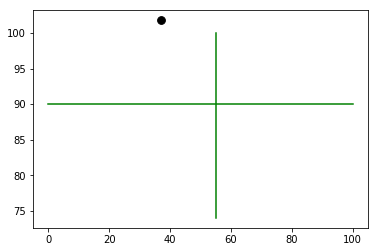

In [13]:
plt.scatter(circularity, compactness, color='black', s=60)
plt.plot([55, 55], [74, 100], color='green')
plt.plot([0, 100], [90, 90], color='green')
plt.show()